In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
%matplotlib inline

C:\Users\NAVNEET KUMAR\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\NAVNEET KUMAR\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\NAVNEET KUMAR\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\NAVNEET KUMAR\anaconda3\lib\site-packages\tensorflow\python\framework\dty

In [3]:
df=pd.read_csv("Tesla.csv")
df.shape

(1692, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


<Figure size 720x720 with 0 Axes>

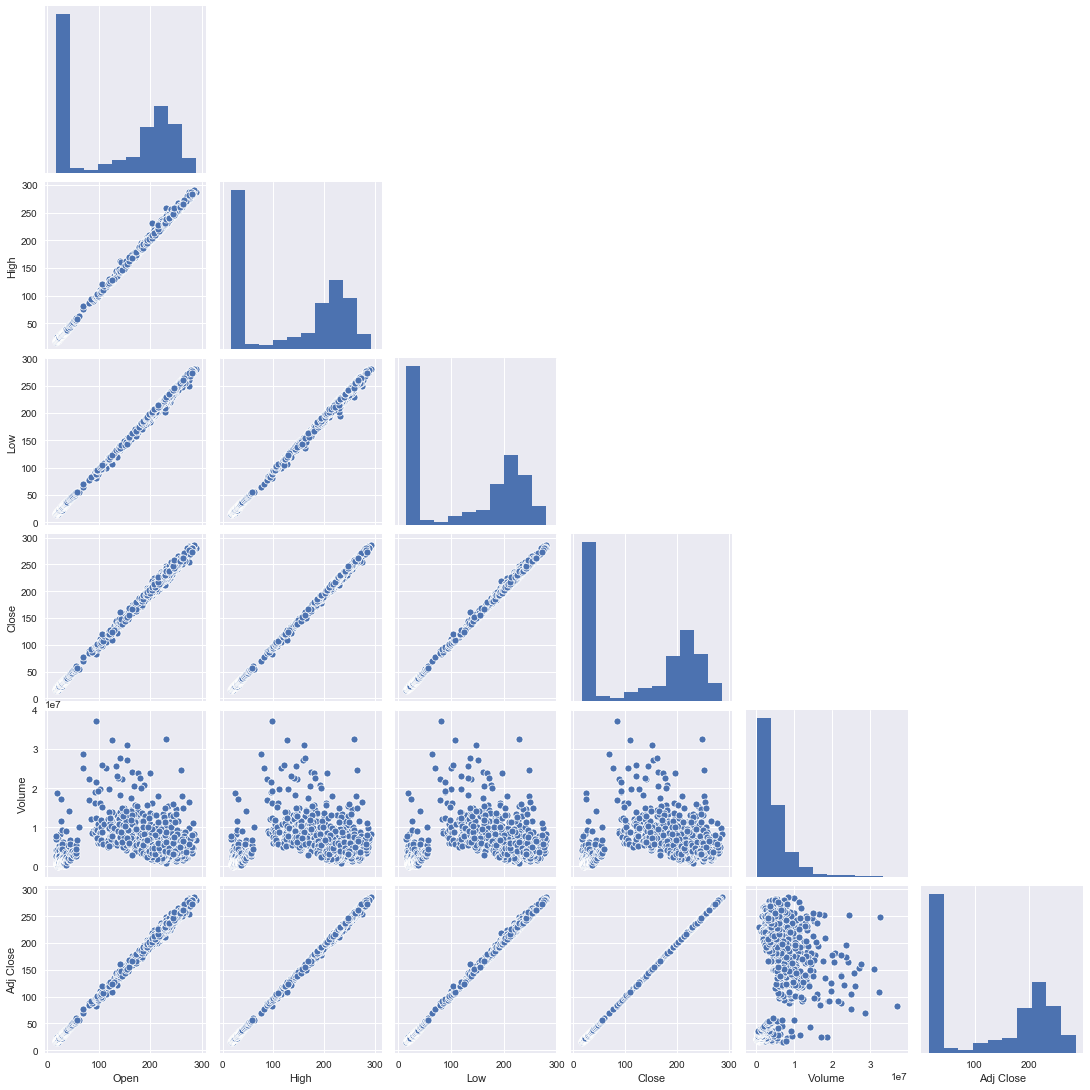

In [8]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df,kind='scatter',corner=True)
plt.show()

# Feature scaling


In [9]:
df.set_index('Date',inplace= True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [11]:
scale=MinMaxScaler()
scalled=scale.fit_transform(df)

In [13]:
i=0
for col in df.columns:
    df[col]=scalled[:,i]
    i+=1

In [14]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
6/29/2010,0.010533,0.030460,0.009645,0.029936,0.503377,0.029936
6/30/2010,0.035539,0.050184,0.031347,0.029714,0.460748,0.029714
7/1/2010,0.032630,0.033808,0.019931,0.022795,0.218659,0.022795
7/2/2010,0.025264,0.023545,0.014053,0.012581,0.135544,0.012581
7/6/2010,0.014216,0.012264,0.003202,0.001147,0.182166,0.001147


In [15]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000
mean,0.428319,0.429927,0.433337,0.431574,0.112085,0.431574
std,0.347328,0.348247,0.349843,0.348998,0.115965,0.348998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051044,0.051021,0.053632,0.052120,0.029041,0.052120
50%,0.516315,0.530369,0.520571,0.526791,0.082661,0.526791
75%,0.752836,0.755013,0.761585,0.755708,0.149643,0.755708
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Spiliting and training


In [17]:
x,y= df.drop('Adj Close',axis=1), df['Adj Close']

In [18]:
x.head()

,Open,High,Low,Close,Volume
Date,,,,,
6/29/2010,0.010533,0.030460,0.009645,0.029936,0.503377
6/30/2010,0.035539,0.050184,0.031347,0.029714,0.460748
7/1/2010,0.032630,0.033808,0.019931,0.022795,0.218659
7/2/2010,0.025264,0.023545,0.014053,0.012581,0.135544
7/6/2010,0.014216,0.012264,0.003202,0.001147,0.182166


In [19]:
y.head()

Date
6/29/2010    0.029936
6/30/2010    0.029714
7/1/2010     0.022795
7/2/2010     0.012581
7/6/2010     0.001147
Name: Adj Close, dtype: float64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [21]:
x_train.shape,x_test.shape

((1184, 5), (508, 5))

# Model building and predictions


In [22]:
model=keras.Sequential([
    keras.layers.Dense(5, input_shape=(5,), activation='linear'),
    keras.layers.Dense(1,activation='linear')
])

model.compile(
loss='mean_squared_error',
optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1184/1184 [==============================] - 0s 352us/sample - loss: 1.3939
Epoch 2/50
1184/1184 [==============================] - 0s 130us/sample - loss: 0.6638
Epoch 3/50
1184/1184 [==============================] - 0s 123us/sample - loss: 0.2945
Epoch 4/50
1184/1184 [==============================] - 0s 136us/sample - loss: 0.1463
Epoch 5/50
1184/1184 [==============================] - 0s 48us/sample - loss: 0.0971
Epoch 6/50
1184/1184 [==============================] - 0s 48us/sample - loss: 0.0770
Epoch 7/50
1184/1184 [==============================] - 0s 44us/sample - loss: 0.0634
Epoch 8/50
1184/1184 [==============================] - 0s 38us/sample - loss: 0.0519
Epoch 9/50
1184/1184 [==============================] - 0s 45us/sample - loss: 0.0419
Epoch 10/50
1184/1184 [==============================] - 0s 62us/sample - loss: 0.0336
Epoch 11/50
1184/1184 [==============================] - 0s 68us/sample - loss: 0.0267
Epoch 12/50
1184/1184 [=========================

In [24]:
model.evaluate(x_test,y_test)

508/508 [==============================] - 0s 106us/sample - loss: 1.6471e-05


1.647149439502139e-05

In [25]:
y_pred_test=model.predict(x_test).flatten()
y_pred_train=model.predict(x_train).flatten()


# Actual vs Predicted

In [26]:
def actual_vs_predicted(y_true,y_pred,title=None,xscale='linear',
                       yscale='linear',return_correlation=False):
    x='Actual'
    y='Predicted'
    plt.figure(figsize=(10,10))
    ap=pd.DataFrame({x:y_true,y:y_pred})
    sns.scatterplot(data=ap,x=x,y=y)
    plt.title(title)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.show()
    if return_correlation:
        return ap.corr()
    
    
     

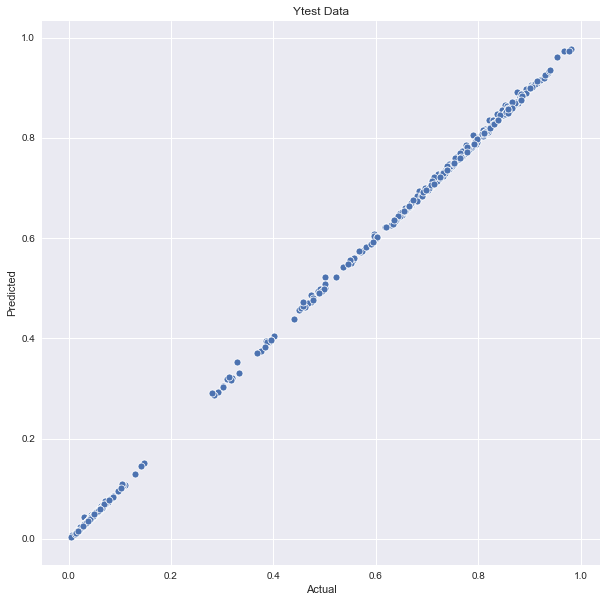

,Actual,Predicted
Actual,1.000000,0.999935
Predicted,0.999935,1.000000


In [27]:
actual_vs_predicted(y_test,y_pred_test,title="Ytest Data",
                   return_correlation=True)

In [28]:
r2_score(y_pred_test,y_test)

0.9998660433172883

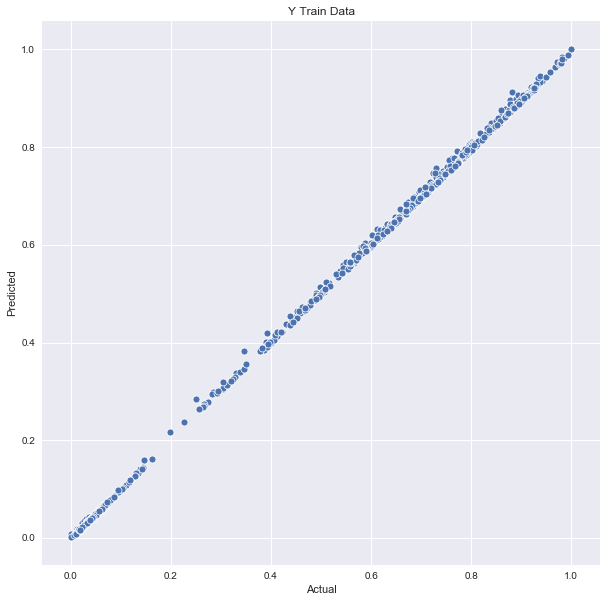

In [29]:
actual_vs_predicted(y_train,y_pred_train,title="Y Train Data")


In [30]:
r2_score(y_pred_train,y_train)

0.9997993185436493

# Compare Actual vs Predicted


In [34]:
def plot_actual_vs_predicted(y_true,y_pred,title=None,xscale='linear',
                            yscale='linear'):
    x='Actual'
    y='Predicted'
    plt.figure(figsize=(10,10))
    ap=pd.DataFrame({x:y_true,y:y_pred})
    ap.sort_values(by=x,ascending=True,inplace=True)
    plt.scatter(np.arange(len(ap[x])),ap[y],color='blue',label=x,linewidth=0.9,marker='*')
    plt.plot(np.arange(len(ap[x])),ap[y],color='red',label=y,linewidth=2)
    
    plt.title(title)
    plt.legend()
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.show()
    
    

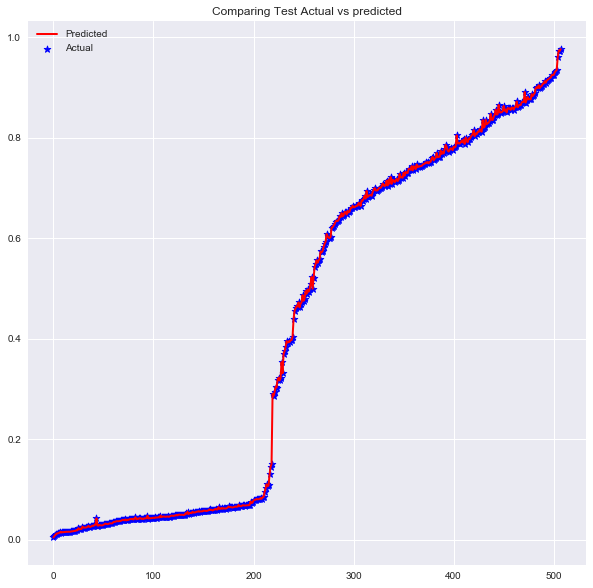

In [35]:
plot_actual_vs_predicted(y_test,y_pred_test,"Comparing Test Actual vs predicted")

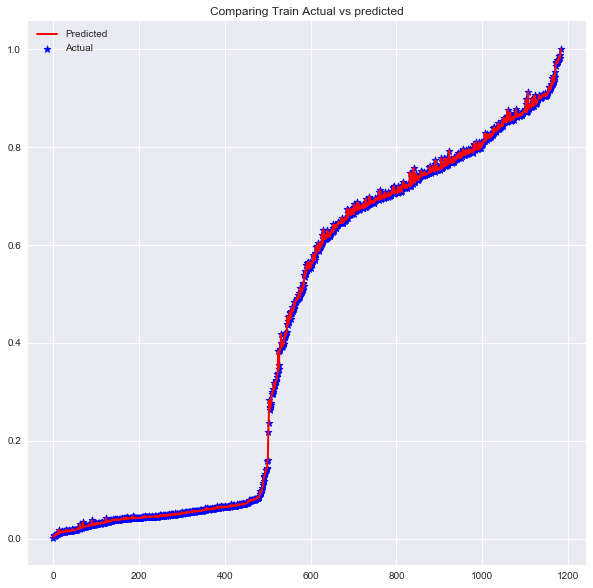

In [37]:
plot_actual_vs_predicted(y_train,y_pred_train,"Comparing Train Actual vs predicted")